In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  5 10:44:06 2020

@author: triet
"""
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import wget
import os
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR, SVC, LinearSVC, LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#refresh data from github of university Johns Hopkins
"""
base_data_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
data_files = ["time_series_covid19_confirmed_global.csv", "time_series_covid19_deaths_global.csv", "time_series_covid19_recovered_global.csv"]

for file in data_files:
    if os.path.exists(file):
        os.remove(file)
    wget.download(os.path.join(base_data_path, file))
"""

'\nbase_data_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"\ndata_files = ["time_series_covid19_confirmed_global.csv", "time_series_covid19_deaths_global.csv", "time_series_covid19_recovered_global.csv"]\n\nfor file in data_files:\n    if os.path.exists(file):\n        os.remove(file)\n    wget.download(os.path.join(base_data_path, file))\n'

In [3]:
#get data of US
data_confirmed = np.asarray(pd.read_csv("./data/time_series_covid19_confirmed_global.csv").to_numpy()[225,4:], dtype=np.uint32).reshape(-1,1)
data_deaths = np.asarray(pd.read_csv("./data/time_series_covid19_deaths_global.csv").to_numpy()[225,4:], dtype=np.uint32).reshape(-1,1)
data_recovered = np.asarray(pd.read_csv("./data/time_series_covid19_recovered_global.csv").to_numpy()[225,4:], dtype=np.uint32).reshape(-1,1)

In [4]:
len(data_confirmed)

94

In [5]:
#get number of days and create an array of days
nb_days = len(data_confirmed)
days = np.arange(nb_days).reshape(-1,1)

In [6]:
sc_X_C = StandardScaler()
sc_X_D = StandardScaler()
sc_X_R = StandardScaler()

sc_y_C = StandardScaler()
sc_y_D = StandardScaler()
sc_y_R = StandardScaler()


#split data for train and test of confirmed, deaths and recovered
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(days, data_confirmed, test_size=0.15, shuffle=True)
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(days, data_deaths, test_size=0.15, shuffle=True)
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(days, data_recovered, test_size=0.15, shuffle=True)

#normalize splitted data
#normalize confirmed cases
X_train_C_transformed = sc_X_C.fit_transform(X_train_C)
X_test_C_transformed  = sc_X_C.transform(X_test_C)

y_train_C_transformed = sc_y_C.fit_transform(y_train_C)
y_test_C_transformed = sc_y_C.transform(y_test_C)

#normalize deaths cases
X_train_D_transformed = sc_X_D.fit_transform(X_train_D)
X_test_D_transformed  = sc_X_D.transform(X_test_D)

y_train_D_transformed = sc_y_D.fit_transform(y_train_D)
y_test_D_transformed = sc_y_D.transform(y_test_D)

#normalize recovered cases
X_train_R_transformed = sc_X_R.fit_transform(X_train_R)
X_test_R_transformed  = sc_X_R.transform(X_test_R)

y_train_R_transformed = sc_y_R.fit_transform(y_train_R)
y_test_R_transformed = sc_y_R.transform(y_test_R)

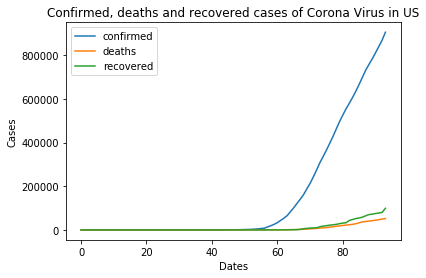

In [7]:
#plot data: confirmed, deaths and recovered 
plt.plot(days, data_confirmed, label='confirmed')
plt.plot(days, data_deaths, label='deaths')
plt.plot(days, data_recovered, label='recovered')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.title('Confirmed, deaths and recovered cases of Corona Virus in US')
plt.legend()

# SVR model
[source](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn.svm.SVR)

In [8]:
#Building SVR models for Confirmed, Deaths and Recovered Cases

clf_C = SVR(kernel='poly', C=1.0, epsilon=0.1)
clf_C.fit(X_train_C_transformed, y_train_C_transformed)

clf_D = SVR(kernel='poly', C=1.0, epsilon=0.1)
clf_D.fit(X_train_D_transformed, X_train_D_transformed)

clf_R = SVR(kernel='poly', C=1.0, epsilon=0.1)
clf_R.fit(X_train_R_transformed, X_train_R_transformed)

/home/triet/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/triet/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/triet/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
#Prediction for models
pred_C_transformed = clf_C.predict(X_test_C_transformed)
pred_C = sc_y_C.inverse_transform(pred_C_transformed)

pred_D_transformed = clf_D.predict(X_test_D_transformed)
pred_D = sc_y_D.inverse_transform(pred_D_transformed)

pred_R_transformed = clf_C.predict(X_test_R_transformed)
pred_R = sc_y_R.inverse_transform(pred_R_transformed)

In [10]:
#Sorted data in time order
p_C, r_C = zip(*sorted(zip(pred_C, y_test_C)))
p_D, r_D = zip(*sorted(zip(pred_D, y_test_D)))
p_R, r_R = zip(*sorted(zip(pred_R, y_test_R)))

## Chart for models prediction

### Predict confirmed cases VS Real confirmed cases

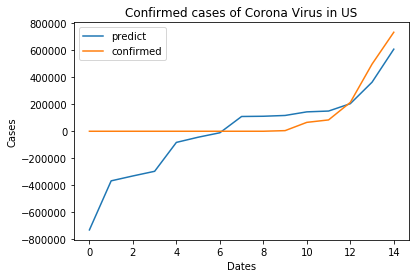

In [11]:
#plot data: Confirmed cases
plt.plot(p_C, label='predict')
plt.plot(r_C, label='confirmed')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.title('Confirmed cases of Corona Virus in US')
plt.legend()

### Predict deaths cases VS Real deaths cases

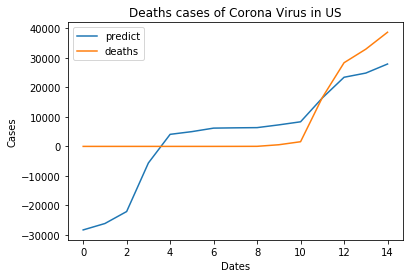

In [12]:
#plot data: Deaths cases
plt.plot(p_D, label='predict')
plt.plot(r_D, label='deaths')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.title('Deaths cases of Corona Virus in US')
plt.legend()

### Predict recovered cases VS Real recovered cases

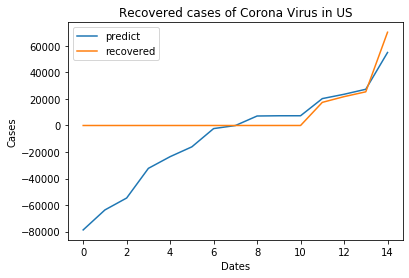

In [13]:
#plot data: Recovered cases
plt.plot(p_R, label='predict')
plt.plot(r_R, label='recovered')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.title('Recovered cases of Corona Virus in US')
plt.legend()